# Monte-Carlo : calcul par conditionnement

$X$ et $Y$ deux r.v indépendantes tel que :     
$X \sim \mathcal{E}(1)$    
$Y \sim \mathcal{E}(2)$       
On pose la r.v $S$ tel que $S = X + Y$ 

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Q1)    
On souhaite construire un estimateur de $\mathbb{V}[S]$.    
$\mathbb{V}[S] = \mathbb{E} \left[ \left( S - \mathbb{E} \left[ S \right] \right)^{2} \right]$    
Supposons que $\mathbb{E} \left[S \right]$ soit connu et que $\mathbb{E} \left[S \right] = m$, on peut obtenir l'estimateur de la variance suivant :
$$
\begin{equation*}
    \mathbb{V}_{n}^{(1)} = \frac{1}{n} \sum_{i=1}^{n} \left( S_{i} - m \right)^{2} 
\end{equation*}
$$
Dans le cas où l'espérance n'est pas connue, on peut l'approcher par la moyenne empirique : $\bar{S}_{n}$   
$$
\begin{equation*}
    \mathbb{V}_{n}^{(2)} = \frac{1}{n} \sum_{i=1}^{n} \left( S_{i} - \bar{S}_{n} \right)^{2} 
\end{equation*}
$$
Mais cet estimateur est biaisé car $\mathbb{E} \left[ \mathbb{V}_{n}^{(2)} \right] = \frac{n-1}{n} \mathbb{V}\left[S\right]$. On pourra donc considérer plutôt : 
$$
\begin{equation*}
    \mathbb{V}_{n}^{(3)} = \frac{1}{n-1} \sum_{i=1}^{n} \left( S_{i} - \bar{S}_{n} \right)^{2} 
\end{equation*}
$$

Q2) On souhaite déterminer $\mathbb{E} \left[ 1_{S>5} | Y = y \right]$
$$
\begin{align*}
    \mathbb{E} \left[ 1_{S>5} | Y = y \right] &= \int 1_{x+y > 5} f_{X | Y=y}(x,y) \mathrm{d}x &\quad \text{théorème de transfert} \\
    &= \int 1_{ \{x+y > 5 \} } \frac{f_{X,Y}(x,y)}{f_{Y}(y)} \mathrm{d}x \\
    &= \int 1_{ \{x+y > 5 \} } \frac{f_{X}(x) f_{Y}(y) }{f_{Y}(y)} \mathrm{d}x &\quad \text{indépendance des v.a} \\
    &= \int 1_{ \{x+y > 5 \} } f_{X}(x) \mathrm{d}x \\
    &= \int_{0}^{+ \infty} 1_{ \{x+y > 5 \} } e^{-x} \mathrm{d}x \\
    &= \int_{max(0, 5-y)}^{+ \infty} e^{-x} \mathrm{d}x \\
    &= \left[ -e^{-x} \right]_{max(0, 5-y)}^{+ \infty} \\
    &= e^{-max(0, 5-y)} \\
\end{align*}
$$      
On a donc :    
$$
\begin{equation*}
   \mathbb{E} \left[ 1_{S>5} | Y  \right] = e^{-max(0, 5-Y)}
\end{equation*}
$$
Par thoérème de l'espérance totale, on a aussi : 
$$
\begin{equation*}
    p = \mathbb{E} \left[ \mathbb{E} \left[ 1_{S>5} | Y  \right] \right]
\end{equation*}
$$
On voit donc qu'on peut approcher p à partir de tirages uniquement de Y.

In [13]:
N = 10000
Y = np.random.exponential(1/2, size = N)
m = np.fmax( np.zeros(len(Y)) , 5-Y )
p = (np.exp(-m)).mean()
print("p = {}".format(p))

p = 0.01340963388743445


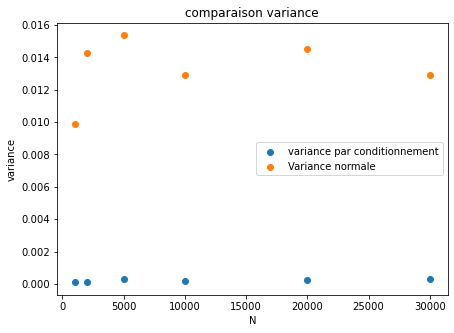

In [28]:
N_arr = [1000,2000,5000,10000,20000,30000]
VarZ = []
VarS = []
for N in N_arr : 
    X = np.random.exponential(1, size = N)
    Y = np.random.exponential(1/2, size = N)
    S = ((X+Y)>5)
    Z = np.exp(-np.fmax( np.zeros(len(Y)) , 5-Y ))
    
    VarZ.append(Z.var())
    VarS.append(S.var())
    
plt.subplots(figsize=(7,5))
plt.scatter(N_arr,VarZ, label = "variance par conditionnement")
plt.scatter(N_arr,VarS, label = "Variance normale")
plt.ylabel("variance")
plt.xlabel("N")
plt.legend()
plt.title("comparaison variance")
plt.show()

Q3)      
On souhaite déterminer la densité de S.    
Soit g une fonction mesurable positive (ou bornée).    
$$
\begin{align*}
\mathbb{E} \left[ g(S) \right] &= \mathbb{E} \left[ g(X+Y) \right]     \\
    &= \int \int g(x+y) f_{X,Y}(x,y) \mathrm{d}x \mathrm{d}y &\quad \text{théorème de transfert} \\
    &= \int_{0}^{+ \infty} \int_{0}^{+ \infty} g(x+y) f_X(x) f_Y(y) \mathrm{d}x \mathrm{d}y  &\quad \text{indépendance des r.v} \\
    &= \int_{0}^{+ \infty} \int_{0}^{+ \infty} g(x+y) 2 e^{-x} e^{-2y} \mathrm{d}x \mathrm{d}y \\
    &= \int_{0}^{+ \infty} \int_{0}^{+ \infty} g(x+y) 2 e^{-(x+y)} e^{-y} \mathrm{d}x \mathrm{d}y \\
\end{align*}
$$
On va procéder à un changement de variable 
$$
\left\{
    \begin{array}{ll}
        u = & x+y \\
        v = & y 
    \end{array}
    \iff 
    \begin{array}{ll}
        x = & u-v \\
        y = & v 
    \end{array}
\right.
$$
Nous devons vérifier que notre changement de variable est bien un $C^1$-difféomorphisme 
$$
J(u,v) = \begin{pmatrix}
\frac{ \partial x }{\partial u} & \frac{ \partial x }{\partial v} \\
\frac{ \partial y }{\partial u} & \frac{ \partial y }{\partial v}
\end{pmatrix} 
 = \begin{pmatrix}
1 & -1 \\
0 & 1
\end{pmatrix} 
$$
Le déterminant de la jacobienne est bien non nul et les changements sont affines donc on a bien un $C^{1}$-difféomorphisme.    
En l'appliquant on trouve : 
$$
\begin{align*}
    \mathbb{E} \left[ g(S) \right] &= \int_{0}^{+ \infty} \int_{0}^{+ \infty} g(x+y) 2 e^{-(x+y)} e^{-y} \mathrm{d}x \mathrm{d}y \\
    &= \int_{0}^{+ \infty} \int_{0}^{u} g(u) 2 e^{-u} e^{-v} \mathrm{d}v \mathrm{d}u \\
    &= \int_{0}^{+ \infty} g(u) 2 e^{-u} \mathrm{d}u \int_{0}^{u}  e^{-v} \mathrm{d}v  \\
    &= \int_{0}^{+ \infty} g(u) 2 e^{-u} \mathrm{d}u \Big[ e^{-v} \Big]^{u}_{0} \\
    &= \int_{0}^{+ \infty} g(u) 2 e^{-u} \left( 1 - e^{-u} \right) \mathrm{d}u \\
\end{align*}
$$
Si on note $f_{S}$ la densité de S, on trouve que : 
$$
\begin{equation*}
    f_{S}(u) =  2 e^{-u} \left( 1 - e^{-u} \right) \mathrm{1}_{\{u \geq 0 \} }
\end{equation*}
$$

On peut calculer p    
$$
\begin{align*}
p = \mathbb{P} \left( S > 5 \right) &= 1 - \mathbb{P} \left( S \leq 5 \right) \\
&= 1 - \int_{0}^{5} f_{S}(u) \mathrm{d}u \\
&= 1 - \int_{0}^{5}  2 e^{-u} \left( 1 - e^{-u} \right)\mathrm{d}u \\
&= 1 - 2 \int_{0}^{5} e^{-u} \left( 1 - e^{-u} \right) \mathrm{1}_{\{u \geq 0 \} }\mathrm{d}u \\
&= 1 - 2 \left(  \left[ - e^{-u} \right]^{5}_{0} + \frac{1}{2} \left[ e^{-2u} \right]^{5}_{0}  \right) \\
&= 1 - 2 \left(  \frac{1}{2} - e^{-5} + \frac{1}{2} e^{-10} \right) \\
&\approx 0,0134
\end{align*}
$$